## K Nearest Neighbor on UMAP Data + HOG +BRISK

In [1]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#previously mapped training data by UMAP
umap_train = pd.read_csv('umap_train_gray_small_hog_brisk.csv')

In [6]:
#previously mapped test data by UMAP (8-Classifier-LinearSVC-small)
umap_test = pd.read_csv('umap_test_gray_small_hog_brisk.csv')

In [8]:
umap_train.head(), type(umap_train)

(   label  embedding x  embedding y
 0    1.0     2.110022    -7.999280
 1    0.0     5.100040     8.833552
 2    3.0    -6.490954     2.556388
 3    0.0     5.625717     7.953938
 4    3.0    -8.826978     4.846537,
 pandas.core.frame.DataFrame)

In [7]:
decipher_key = {
    0:"Pants",
    1:"Tshirts",
    2:"Watches",
    3:"Casual Shoes"
 
}

**convert the data to numpy.array***

In [8]:
#train_df.iloc[:, 1:].values.astype(np.float32)
x_train_u = umap_train.iloc[:, 1:].values.astype(np.float32)
y_train_u =umap_train['label'].values


In [9]:
x_test_u = umap_test.iloc[:, 1:].values.astype(np.float32)
y_test_u =umap_test['label'].values

In [11]:
x_test_u.shape, y_test_u.shape

((965, 2), (965,))

### Fit KNN model

In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [13]:
# labels' are the labels for each point
labels = np.array([0, 1, 2, 3])  #labels


data = np.column_stack((x_train_u , y_train_u ))

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_u, y_train_u)



KNeighborsClassifier(n_neighbors=3)

**save knn model***

In [14]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(knn)

# Save the model to disk
with open('knn_gray_small_hog_brisk.pkl', 'wb') as file:
    pickle.dump(knn, file)

**load knn model**

In [15]:
# Load the model from disk
with open('knn_gray_small_hog_brisk.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

**predict**

In [16]:
# classify data

y_pred_u = loaded_model.predict(x_test_u)

#print(new_labels)


**metrics data**

In [17]:
from sklearn.metrics import accuracy_score

# Assuming y_test_u are the true labels for the test set
accuracy = accuracy_score(y_test_u, y_pred_u)

print(f'The accuracy of the KNN model is {accuracy:.2f}')


The accuracy of the KNN model is 0.95


**accuracy for each category**

In [19]:
#each category in each array
x_tlistu =[]
y_tlistu = []
tlabelu =[]
for i in range(4):
    indices = np.where(y_test_u == i)[0]
    y_tlistu.append(y_test_u[indices])
    x_tlistu.append(x_test_u[indices])
    tlabelu.append(decipher_key[i])
    
y_tlistu[0].shape, y_tlistu[0][0:3]

((239,), array([0., 0., 0.]))

In [20]:
for i in range(4):
    print("Accuracy on the",tlabelu[i]," test set with grayscale image: {:.3f}".\
          format(loaded_model.score(x_tlistu[i], y_tlistu[i])))

Accuracy on the Pants  test set with grayscale image: 0.958
Accuracy on the Tshirts  test set with grayscale image: 0.943
Accuracy on the Watches  test set with grayscale image: 0.940
Accuracy on the Casual Shoes  test set with grayscale image: 0.976


In [21]:
from sklearn.metrics import confusion_matrix
#x_tlist[i]
#y_tlist[i]

# Use the fitted model to make predictions on the same data used for fitting
y_pred_u = loaded_model.predict(x_test_u)

# Generate the confusion matrix
cm = confusion_matrix(y_test_u, y_pred_u)

print(cm)

[[229   8   0   2]
 [  5 214   8   0]
 [  7   6 235   2]
 [  0   6   0 243]]


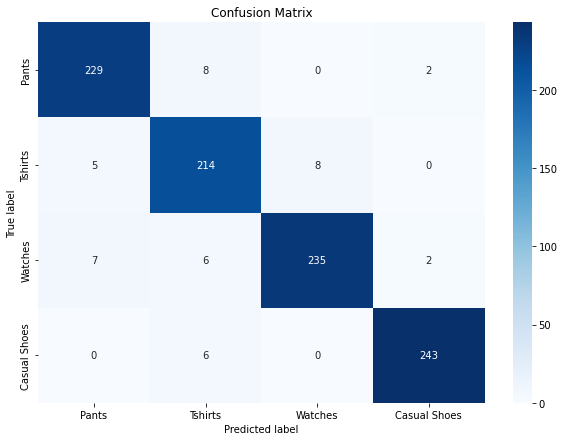

In [22]:

# Create a heatmap
# Create a list of labels
labels = [decipher_key[i] for i in range(4)]
plt.figure(figsize=(10,7))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**pull examples**

In [23]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test_u)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test_u[i] == 0) and (y_pred_u[i] == 1):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]




In [24]:
misclassified_indexes

[203, 299, 326, 355, 518, 840, 868, 927]

In [25]:
x_test_u[164]

array([ 5.5898676 , -0.28811187], dtype=float32)

**load data to check on misclassified example**

In [ ]:
test_df = pd.read_csv('gray_small_test_set.csv')

test_img = test_df.iloc[:, 1:].values.astype(np.float32)

test_label = test_df['label'].values

In [38]:
temp =164
img_gray  = np.reshape(test_img[temp], newshape=(40,30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As Pants"
axarr.title.set_text(title)
axarr.imshow(img_gray, cmap='gray')

NameError: name 'val_data' is not defined